In [1]:
#Project 3

import numpy as np #For linear algebra
import pandas as pd #For data Preprocessing
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
from scipy import stats

#Reading the data
df = pd.read_csv("https://raw.githubusercontent.com/JasonTPhillipsJr/Data_Preprocessing_Projects/main/Churn_Modelling.csv")

#Normalizing the data (may not be needed for now)
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

#Scrambles the data around (Also may be needed for better testing later.)
#df = df.reindex(np.random.permutation(df.index)) 
#df.reset_index(inplace = True, drop = True)

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
"""
We need to convert two attributes into float values so that they can be used in some of the classification functions.
We are going to convert Geography and Gender into numerical values so that they can be used in mathematical functions.
"""
#Printing the unique values for geography.
uniqueValues = df['Geography'].nunique(dropna=False)
print("Number of unique values in this Geography: ", uniqueValues)
df.Geography.unique()



Number of unique values in this Geography:  3


array(['France', 'Spain', 'Germany'], dtype=object)

In [3]:
#Replace the unique values in the Geography Attribute with numerical values
#1 = France, 2 = Spain, 3 = Germany
df['Geography'] = df['Geography'].replace('France', 1)
df['Geography'] = df['Geography'].replace('Spain', 2)
df['Geography'] = df['Geography'].replace('Germany', 3)

#Replace the Male and Female with 1 and 2
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 2)


In [4]:
#Normalize the data
"""
Ok, so for the classification tree we don't need to normalize the data because the tree will just take the values and make a choice
However, we need to normalize the data for the other models because the values are too far apart that the weights we apply harm the results.
For now, I will just leave all the values normalized for the purpose of finishing the other models.
"""
normalize_numeric_minmax(df,'CreditScore')
normalize_numeric_minmax(df,'Age')
normalize_numeric_minmax(df,'Balance')
normalize_numeric_minmax(df,'EstimatedSalary')
normalize_numeric_minmax(df,'Tenure')
normalize_numeric_minmax(df,'NumOfProducts')

In [5]:
"""
What we are trying to do with this dataset is classify whether a customer will Exit or Not Exit based off
their other attributes.
   
The attributes we are concerened with are: Credit Score, Region, Gender, Age, Tenure, Balance, NumOfProducts,
HasCrCard, IsActiveMember,Salary.
"""
#Setup the training and testing data.
numInstances = 10000
numTrain = 2000
numTest = numInstances - numTrain

#Create the training and testing datasets.
trainingData = df[:numTest]
testData = df[numTest:]

#Creating our X and Y datasets.
trainY = pd.DataFrame(trainingData, columns = ["Exited"])
trainX = trainingData.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

#Create our x and Y testsets.
testY = pd.DataFrame(testData, columns = ["Exited"])
testX = testData.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

#Print out the X dataset (our inputs)
trainX

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,1,2,0.324324,0.2,0.000000,0.000000,1,1,0.506735
1,0.516,2,2,0.310811,0.1,0.334031,0.000000,0,1,0.562709
2,0.304,1,2,0.324324,0.8,0.636357,0.666667,1,0,0.569654
3,0.698,1,2,0.283784,0.1,0.000000,0.333333,0,0,0.469120
4,1.000,2,2,0.337838,0.2,0.500246,0.000000,1,1,0.395400
...,...,...,...,...,...,...,...,...,...,...
7995,0.716,1,2,0.662162,0.1,0.000000,0.333333,0,1,0.019129
7996,0.734,1,2,0.054054,0.5,0.448250,0.000000,1,1,0.464875
7997,0.230,3,1,0.081081,0.6,0.621795,0.000000,1,0,0.956875
7998,0.958,3,1,0.135135,0.3,0.527726,0.666667,1,0,0.524438


In [6]:
#Print out the Y dataset (our possible outputs)
trainY

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
7995,0
7996,0
7997,0
7998,1


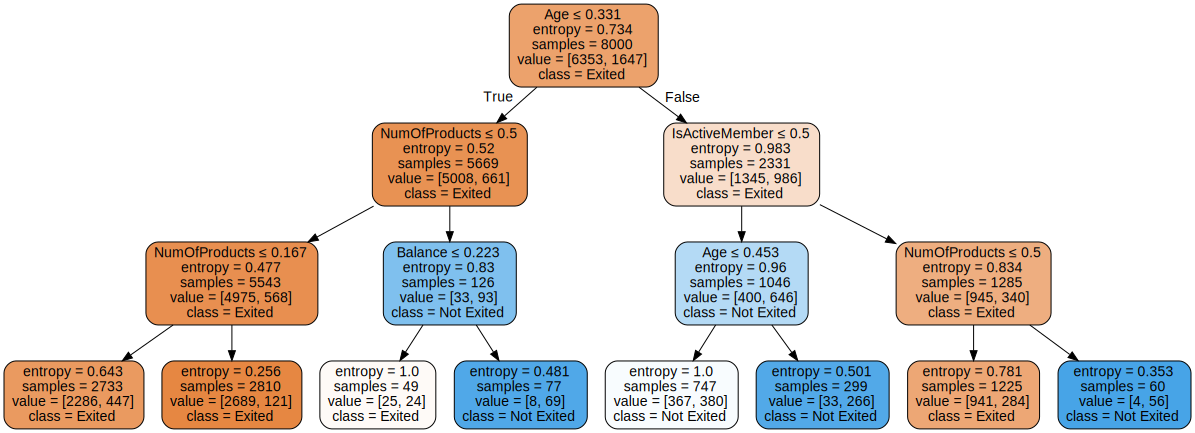

In [8]:
#Creating the Classification Tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) #We should keep an eye on the max depth to adjust the tree.
clf = clf.fit(trainX,trainY)


#Create the data for the graph
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = trainX.columns, class_names = ['Exited', 'Not Exited'],
                                filled = True, rounded = True, special_characters = True)
#Create the graph to display the data.
graph = graphviz.Source(dot_data)
graph


In [10]:
print("Accuracy = %f" % clf.score(testX,testY))
"""
Notice here is a byproduct of normalizing the values (putting the values in a similar range)
Age is now a decimal as are the rest of the features. We should normalize after the tree.
"""

Accuracy = 0.821500
Accuracy = 0.821500


'\nNotice here is a byproduct of normalizing the values (putting the values in a similar range)\nAge is now a decimal as are the rest of the features. We should normalize after the tree.\n'

In [8]:
#Just a helper cell for me.
myprediction = clf.predict(testX)
sum = 0
for i in range(0, len(myprediction)):
  sum = sum + myprediction[i]

print(sum)

287


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.815

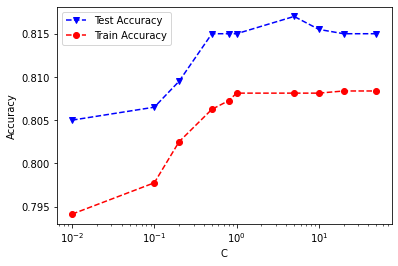

In [12]:
"""
The parameter we define here "C" is going to be the weight that the data has on the model.
As it progressively becomes higher, the more weight that the point has on the outcome.
"""
#Logistic Regression (With a parameter C.)
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

#Create two arrays for the logistic accuracy for both training and testing sets.
LRtestAcc = []
LRtrainAcc = []

#For loop to use each weight to predict the proper output. The less weight, the less that the datapoints in X influence the outcome.
for param in C:
  clf = LogisticRegression(C = param)
  clf.fit(testX,testY)
  log_reg_pred = clf. predict(testX)
  log_reg_pred_train = clf.predict(trainX)
  #print(log_reg_pred)
  LRtestAcc.append(accuracy_score(testY, log_reg_pred))
  LRtrainAcc.append(accuracy_score(trainY,log_reg_pred_train))

#Create a plot to visualize the logistic regression line and the accuracy of our models predictions.
plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

""" This works but for the sake of the tutorial we will be using the parameter instead.
clf = LogisticRegression(random_state = 0)
clf.fit(trainX, trainY)
"""
clf.score(testX, testY)

In [13]:
print("Accuracy = %f" % clf.score(testX,testY))

Accuracy = 0.815000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Text(0, 0.5, 'Accuracy')

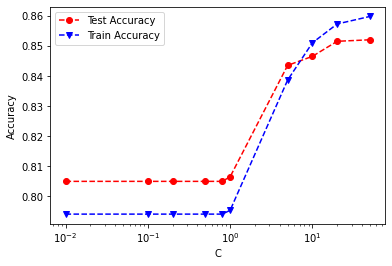

In [14]:
#SVM Non Linear Example
#Creating the arrays for the accuracy of the test and trainning sets.
SVMLtestAcc = [] 
SVMLtrainAcc = []

#predY = clf.predict(testX)
#print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

#For loop to iterate each weight we place on the models data.
for param in C:
   clf = SVC(C=param, kernel='rbf', gamma='auto') 
   clf.fit(trainX,trainY) 
   svml_pred = clf.predict(testX) 
   svml_pred_train = clf.predict(trainX)
   SVMLtestAcc.append(accuracy_score(testY, svml_pred)) 
   SVMLtrainAcc.append(accuracy_score(trainY,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--') 
plt.legend(['Test Accuracy','Train Accuracy']) 
plt.xlabel('C') 
plt.xscale('log') 
plt.ylabel('Accuracy')


In [15]:
model_svml=clf.fit(trainX, trainY).predict(testX)
print('Accuracy on test data is %.3f for SVM Linear' % (accuracy_score(testY, model_svml)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on test data is 0.852 for SVM Linear


In [16]:
#---Naive Bayes---

clf_NB = GaussianNB()
clf_NB.fit(trainX,trainY)
NB_pred = clf_NB.predict(testX)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))


Accuracy on test data is 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Accuracy')

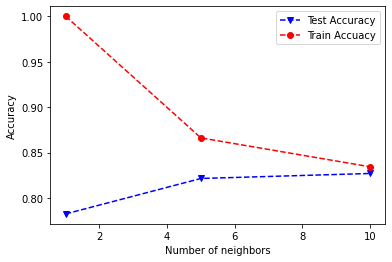

In [17]:
#K Nearest Neighbor
numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(trainX, trainY)
    knn_pred = clf.predict(testX)
    knn_pred_train = clf.predict(trainX)
    testAcc.append(accuracy_score(testY, knn_pred))
    trainAcc.append(accuracy_score(trainY,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')



In [18]:
print("Accuracy = %f" % clf.score(testX,testY))

Accuracy = 0.827000
